### *Workflow inspired by Manav Sehgal in Titanic Data Science Solution*

## Load libraries, models and Data

In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
sns.set_palette("Set2")

In [3]:
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
combine = [train_df, test_df]

## Data Analysis

### Describe data

In [4]:
train_df.columns.values

array(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination',
       'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Name', 'Transported'], dtype=object)

In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


* categorical: HomePlanet, CryoSleep, VIP, Transported
* numerical: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
* mixed (numeric and alphanumeric): Cabin, Destination

In [6]:
train_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [7]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 colu

In [8]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
train_df.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


Column to drop: PassengerId, Cabin, Name

### Pivoting features

convert column Transported to numerical

In [10]:
train_df['Transported'] = train_df['Transported'].map({True: 1, False: 0}).astype(int)

In [11]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [12]:
train_df[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


In [13]:
train_df[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


In [14]:
train_df[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


In [15]:
train_df[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,VIP,Transported
0,False,0.506332
1,True,0.381910


### Visualizing data

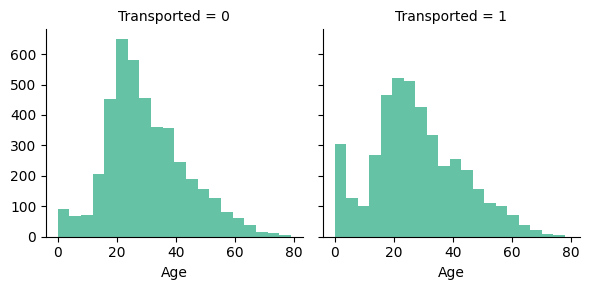

In [16]:
g = sns.FacetGrid(train_df, col='Transported')
g.map(plt.hist, 'Age', bins=20)

Observations:
* Infants (Age <= 4) had high transported rate.
* Most passengers are in 15-35 age range.
* Large number of 15-30 years olds did not transport.

Decisions:
* Consider Age in model training.
* Complete the Age feature for nul values.
* Band age groups.

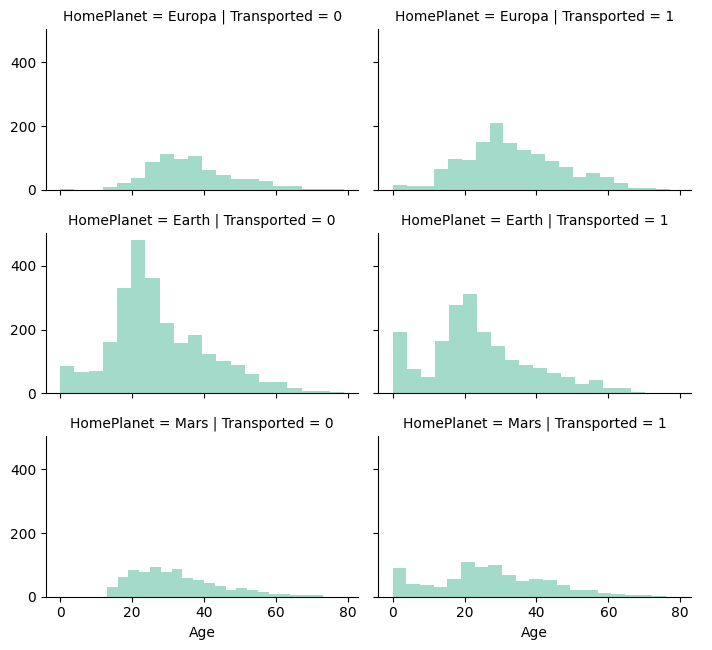

In [17]:
#grid = sns.FacetGrid(train_df, col='HomePlanet', hue='Transported')
grid = sns.FacetGrid(train_df, row='HomePlanet', col='Transported', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.6, bins=20)
grid.add_legend()

Observations:
* Most passengers was from Earth, however most did not transport.
* All children (Age <= 15) from Mars were transported.
* Most passengers from Europe and Mars were transported.

Decisions:
* Consider HomePlanet for model training.
* Complete HomePlanet feature for null values.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


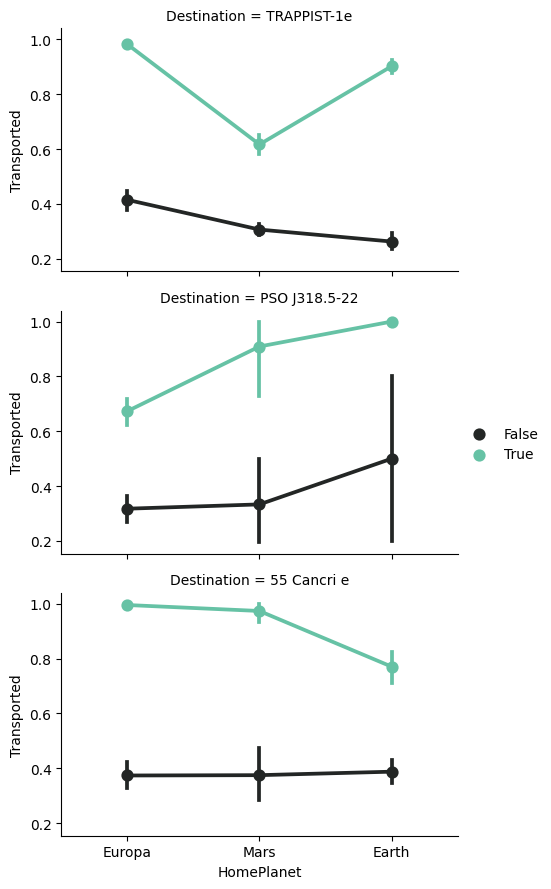

In [18]:
grid = sns.FacetGrid(train_df, row='Destination', aspect=1.6)
grid.map(sns.pointplot, 'HomePlanet', 'Transported', 'CryoSleep')
grid.add_legend()

Observations:
* CryoSleep passengers had much better transport rate.

Decisons:
* Complete CryoSleep and Destination features for null values.
* Add CryoSleep and Destinaton feature to model training.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


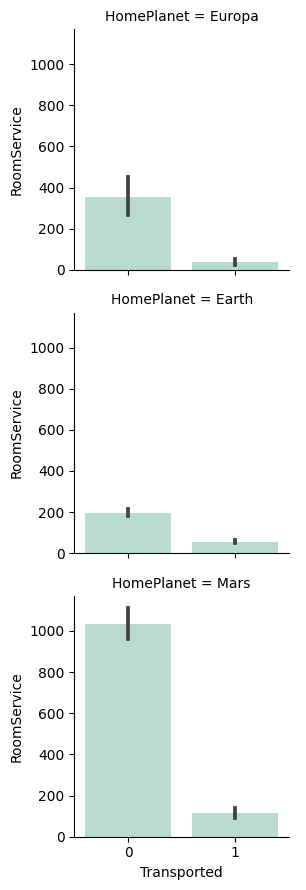

In [19]:
grid = sns.FacetGrid(train_df, row='HomePlanet')
grid.map(sns.barplot, 'Transported', 'RoomService', alpha=.5)
grid.add_legend()

Observation:
* Passengers from Mars paid the most for room service, but most of them were not transported.

Decision:
* Consider RoomService for model training.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


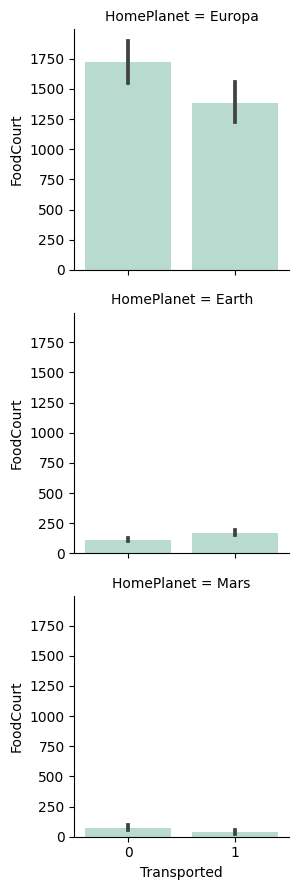

In [20]:
grid = sns.FacetGrid(train_df, row='HomePlanet')
grid.map(sns.barplot, 'Transported', 'FoodCourt', alpha=.5)
grid.add_legend()

Observation:
* Passengers from Europa paid the most for food court.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


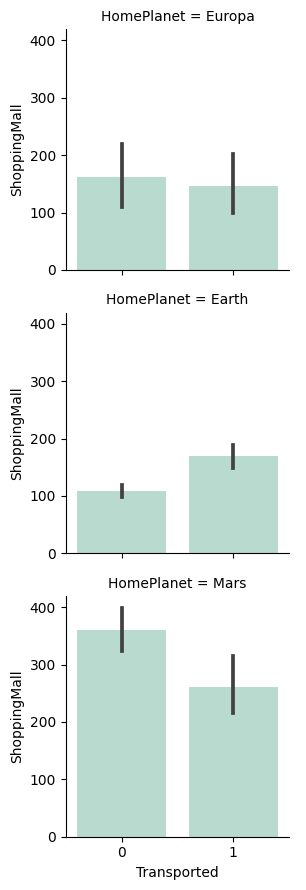

In [21]:
grid = sns.FacetGrid(train_df, row='HomePlanet')
grid.map(sns.barplot, 'Transported', 'ShoppingMall', alpha=.5)
grid.add_legend()

Observation:
* Passengers from Mars paid the most for shopping mall.


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


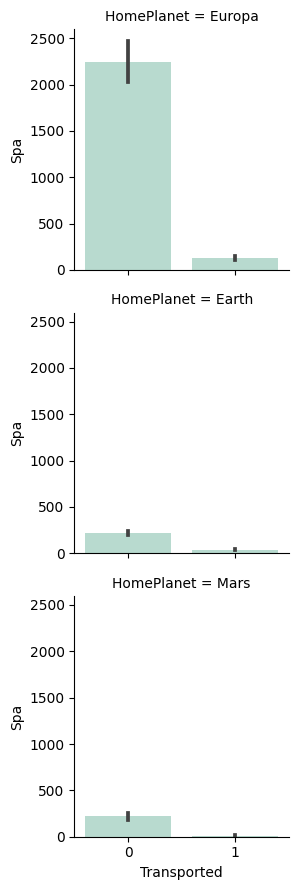

In [22]:
grid = sns.FacetGrid(train_df, row='HomePlanet')
grid.map(sns.barplot, 'Transported', 'Spa', alpha=.5)
grid.add_legend()

Observation:
* Passengers from Europa paid the most for spa, but most of them were not transported.

Decision:
* Consider Spa for model training.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


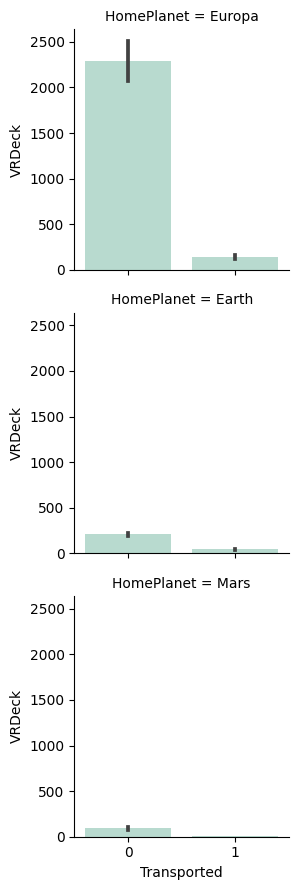

In [23]:
grid = sns.FacetGrid(train_df, row='HomePlanet')
grid.map(sns.barplot, 'Transported', 'VRDeck', alpha=.5)
grid.add_legend()

Observation:
* Passengers from Europa paid the most for VRDeck, but most of them were not transported.

Decision:
* Consider VRDeck for model training.
* Create Luxury Amenities feature (sum of Room Service, Food Court, Shopping Mall, Spa and VRDeck).

## Data wrangling

### Dropping features

Column to drop: PassengerId, Cabin, Name

In [24]:
print('Before:', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['PassengerId', 'Cabin', 'Name'], axis=1)
test_df = test_df.drop(['Cabin', 'Name'], axis=1)
combine = [train_df, test_df]

'After:', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before: (8693, 14) (4277, 13) (8693, 14) (4277, 13)


('After:', (8693, 11), (4277, 11), (8693, 11), (4277, 11))